# Inteligência Artificial Aplicada a Finanças

# Projeto 5 - Detecção de Fraudes em FinTechs com IA

## Definindo o Problema

Leia o manual em pdf no Capítulo 8 do curso.

## Fonte de Dados

Leia o manual em pdf no Capítulo 8 do curso.

### Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from random import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.1.4
matplotlib: 3.3.3
numpy     : 1.19.4
sys       : 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]



## Carregando os Dados

Primeiro definimos o arquivo.

In [5]:
# Obtendo o diretório corrente
caminho_dados = os.path.abspath(os.path.join('.'))
if caminho_dados not in sys.path:
    sys.path.append(caminho_dados)

In [6]:
caminho_dados

'/Users/dmpm/Dropbox/DSA/IA_Aplicada_Fin/Cap08'

In [7]:
arquivo_completo = caminho_dados + '/dados/dataset.csv'
arquivo_completo

'/Users/dmpm/Dropbox/DSA/IA_Aplicada_Fin/Cap08/dados/dataset.csv'

Agora carregamos o arquivo em dataframe Pandas.

In [8]:
# Carrega o dataset
dataset_completo = pd.read_csv(arquivo_completo)

In [9]:
# Shape
dataset_completo.shape

(46960, 96)

In [10]:
# Visualiza os dados
dataset_completo.head(10)

,ID,is_email_acct,certificationtype,registered_channels,sex,age,registered_days,area1_danger,area4_danger,is_area3_eqaul_area4,...,10m_pay_times,12h_pay_times,1d_pay_times,1h_pay_times,30m_pay_times,10m_Sum_pay_amount,12h_Sum_pay_amount,1d_Sum_pay_amount,1h_Sum_pay_amount,flag
0,0,0.0,2,SDK,1.0,42,219,5.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1,NaN,4,NaN,NaN,0,0,5.0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2,0.0,3,PC,1.0,27,620,5.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,3,0.0,2,NaN,2.0,41,1188,5.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,NaN,4,NaN,NaN,0,0,5.0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5,5,0.0,3,WAP,1.0,32,563,5.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
6,6,0.0,4,PC,NaN,0,162,5.0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
7,7,1.0,3,NaN,1.0,44,1014,5.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,8,1.0,3,NaN,1.0,32,1328,5.0,1,0,...,NaN,1.0,1.0,NaN,NaN,NaN,329800.0,329800,NaN,0
9,9,0.0,4,NaN,NaN,0,967,5.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [11]:
# Tipos de dados
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46960 entries, 0 to 46959
Data columns (total 96 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     46960 non-null  int64  
 1   is_email_acct          41314 non-null  float64
 2   certificationtype      46960 non-null  int64  
 3   registered_channels    29437 non-null  object 
 4   sex                    33313 non-null  float64
 5   age                    46960 non-null  int64  
 6   registered_days        46960 non-null  int64  
 7   area1_danger           46946 non-null  float64
 8   area4_danger           46960 non-null  int64  
 9   is_area3_eqaul_area4   46960 non-null  int64  
 10  is_area3_equal_area6   46960 non-null  int64  
 11  is_area4_equal_area6   46960 non-null  int64  
 12  is_area5_equal_area3   46960 non-null  int64  
 13  is_area5_equal_area4   46960 non-null  int64  
 14  is_area5_equal_area6   46960 non-null  int64  
 15  is

In [12]:
dataset_completo['flag'].value_counts()

0    46439
1      521
Name: flag, dtype: int64

In [13]:
print('Taxa de Transações Fraudulentas no Dataset Completo: {0:2.4f}%'.format(dataset_completo['flag'].mean() * 100))

Taxa de Transações Fraudulentas no Dataset Completo: 1.1095%


In [14]:
# Divisão em dados de treino e teste
dados_treino, dados_teste = train_test_split(dataset_completo, test_size = 0.3)

In [15]:
print('Taxa de Transações Fraudulentas nos Dados de Treino: {0:2.4f}%'.format(dados_treino['flag'].mean() * 100))

Taxa de Transações Fraudulentas nos Dados de Treino: 1.1438%


## Limpeza, Processamento e Engenharia de Atributos

In [16]:
# Módulo customizado
from tools.ProcessamentoBasico import *

In [17]:
# Cria instância da classe
feature_process = ProcessamentoBasico()

In [18]:
# Checa valores constantes
fixed_cols = feature_process.fix_value_check(dados_treino)

In [19]:
if fixed_cols:
    print('Coluna com Valor Constante:', fixed_cols)
    dados_treino = dados_treino.drop(fixed_cols, axis = 1).copy()
else:
    print('Não há Coluna com Valor Constante')

Coluna com Valor Constante: ['ip_desc_danger']


In [20]:
# Se a idade for igual a zero, substitui por valor nan
dados_treino.loc[dados_treino.age==0, 'age'] = np.nan

In [21]:
# Extrai a taxa de valores ausentes por coluna
missing_rate_df = feature_process.missing_value_pct(dados_treino)

In [22]:
missing_rate_df.head()

,missing_rate
1h_release_bank_cnt,0.975116
12h_release_bank_cnt,0.962278
24h_release_bank_cnt,0.959084
10m_pay_times,0.888963
10m_Sum_pay_amount,0.888842


Text(0.5, 1.0, 'Taxa de Valores Ausentes Por Coluna')

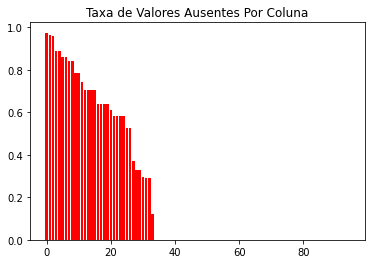

In [23]:
# Plot
plt.bar(x = range(missing_rate_df.shape[0]), height = missing_rate_df['missing_rate'], color = 'red')
plt.title('Taxa de Valores Ausentes Por Coluna')

In [24]:
# Colunas com valores ausentes
columns_with_missing = missing_rate_df.index[missing_rate_df.missing_rate > 0].tolist()

In [25]:
# Indica no dataframe as colunas com valores ausentes
dados_treino = feature_process.add_missing_indicator_to_df(data = dados_treino, cols = columns_with_missing)

In [26]:
dados_treino.head()

,ID,is_email_acct,certificationtype,registered_channels,sex,age,registered_days,area1_danger,area4_danger,is_area3_eqaul_area4,...,60d_Sum_pay_amount_ismissing,60d_pay_times_ismissing,registered_channels_ismissing,90days_sign_bank_cnt_ismissing,30days_sign_bank_cnt_ismissing,area8_danger_ismissing,sex_ismissing,age_ismissing,is_email_acct_ismissing,area1_danger_ismissing
19985,19985,NaN,4,NaN,NaN,NaN,0,5.0,1,1,...,1,1,1,1,1,1,1,1,1,0
37095,37095,0.0,2,PC,1.0,31.0,397,5.0,5,0,...,0,0,0,0,0,0,0,0,0,0
42979,42979,0.0,3,WAP,1.0,30.0,25,5.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1615,1615,0.0,3,PC,1.0,30.0,716,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
37923,37923,0.0,2,WAP,2.0,22.0,241,5.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Identificando variáveis do tipo object
obj_types = feature_process.feature_type_identifier(dados_treino, 'O')
obj_types

['registered_channels', 'area11_danger', 'area6_danger']

In [28]:
dados_treino.head()

,ID,is_email_acct,certificationtype,registered_channels,sex,age,registered_days,area1_danger,area4_danger,is_area3_eqaul_area4,...,60d_Sum_pay_amount_ismissing,60d_pay_times_ismissing,registered_channels_ismissing,90days_sign_bank_cnt_ismissing,30days_sign_bank_cnt_ismissing,area8_danger_ismissing,sex_ismissing,age_ismissing,is_email_acct_ismissing,area1_danger_ismissing
19985,19985,NaN,4,NaN,NaN,NaN,0,5.0,1,1,...,1,1,1,1,1,1,1,1,1,0
37095,37095,0.0,2,PC,1.0,31.0,397,5.0,5,0,...,0,0,0,0,0,0,0,0,0,0
42979,42979,0.0,3,WAP,1.0,30.0,25,5.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1615,1615,0.0,3,PC,1.0,30.0,716,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
37923,37923,0.0,2,WAP,2.0,22.0,241,5.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Valores únicos por coluna
data_counts = dados_treino.nunique() 
data_counts

ID                         32872
is_email_acct                  2
certificationtype              4
registered_channels            7
sex                            2
                           ...  
area8_danger_ismissing         2
sex_ismissing                  2
age_ismissing                  2
is_email_acct_ismissing        2
area1_danger_ismissing         2
Length: 130, dtype: int64

In [30]:
# Colunas com 10 ou menos valores únicos serão do tipo categórico
categorical_cols = data_counts.index[data_counts <= 10].tolist()
categorical_cols = list(set(categorical_cols  + obj_types) - set(['flag']))

In [31]:
# Valores ausentes nas variáveis categóricas
categoriacal_cols_with_missing = list(set(columns_with_missing) & set(categorical_cols))

In [32]:
# Cria variáveis dummy
dummy_result = feature_process.get_categorical_dummy_variable(dados_treino, categorical_cols)

In [33]:
# Novo dataset de treino
dados_treino = dummy_result['data']

In [34]:
dados_treino.shape

(32872, 226)

In [35]:
dados_treino.head()

,is_area7_equal_area4_0,is_area7_equal_area4_1,is_area2_equal_area8_0,is_area2_equal_area8_1,15d_Max_pay_amount_ismissing_0,15d_Max_pay_amount_ismissing_1,sex_ismissing_0,sex_ismissing_1,is_area9_equal_area5_0,registered_channels_31,...,10m_pay_times,12h_pay_times,1d_pay_times,1h_pay_times,30m_pay_times,10m_Sum_pay_amount,12h_Sum_pay_amount,1d_Sum_pay_amount,1h_Sum_pay_amount,flag
19985,1,0,1,0,0,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
37095,0,1,1,0,1,0,1,0,1,0,...,NaN,105.0,105.0,65.0,65.0,NaN,31557380.0,31557380,21048740.0,0
42979,0,1,1,0,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1615,0,1,1,0,1,0,1,0,1,0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,737800,NaN,0
37923,0,1,1,0,1,0,1,0,1,0,...,NaN,86.0,195.0,NaN,NaN,NaN,19325900.0,37229200,NaN,0


In [36]:
# Colunas dummy
dummy_columns = dummy_result['dummy_cols']

In [37]:
# Colunas de valores contínuos com valores ausentes
continues_col_with_missing = list(set(columns_with_missing) - set(categoriacal_cols_with_missing))

In [38]:
# Preenchemos valores ausentes com 0
dados_treino[continues_col_with_missing] = dados_treino[continues_col_with_missing].fillna(0)

## Tratamento nos Dados

In [39]:
dados_treino.head()

,is_area7_equal_area4_0,is_area7_equal_area4_1,is_area2_equal_area8_0,is_area2_equal_area8_1,15d_Max_pay_amount_ismissing_0,15d_Max_pay_amount_ismissing_1,sex_ismissing_0,sex_ismissing_1,is_area9_equal_area5_0,registered_channels_31,...,10m_pay_times,12h_pay_times,1d_pay_times,1h_pay_times,30m_pay_times,10m_Sum_pay_amount,12h_Sum_pay_amount,1d_Sum_pay_amount,1h_Sum_pay_amount,flag
19985,1,0,1,0,0,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
37095,0,1,1,0,1,0,1,0,1,0,...,0.0,105.0,105.0,65.0,65.0,0.0,31557380.0,31557380,21048740.0,0
42979,0,1,1,0,1,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1615,0,1,1,0,1,0,1,0,1,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,737800,0.0,0
37923,0,1,1,0,1,0,1,0,1,0,...,0.0,86.0,195.0,0.0,0.0,0.0,19325900.0,37229200,0.0,0


In [40]:
# Módulo customizado
from tools.FeatureDerivative import *

In [41]:
# Instância da classe
feature_derive = FeatureDerivative()

In [42]:
# Calcula a média de pagamento
dados_treino = feature_derive.avg_payment_derivative(dados_treino)

In [43]:
# Ajusta as colunas, removendo ID e flag
all_columns = list(dados_treino.columns)
all_columns.remove('ID')
all_columns.remove('flag')

In [44]:
# Colunas numéricas
numerical_columns = list(set(all_columns) - set(dummy_columns) - set(categorical_cols))

In [45]:
dados_treino.head()

,is_area7_equal_area4_0,is_area7_equal_area4_1,is_area2_equal_area8_0,is_area2_equal_area8_1,15d_Max_pay_amount_ismissing_0,15d_Max_pay_amount_ismissing_1,sex_ismissing_0,sex_ismissing_1,is_area9_equal_area5_0,registered_channels_31,...,10m_30m_payment_increase,30m_1h_payment_increase,1h_12h_payment_increase,12h_1d_payment_increase,1d_7d_payment_increase,7d_15d_payment_increase,15d_30d_payment_increase,30d_60d_payment_increase,60d_90d_payment_increase,max_Avg_pay_amount
19985,1,0,1,0,0,1,0,1,1,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37095,0,1,1,0,1,0,1,0,1,0,...,323826.769231,0.0,-23280.293040,0.000000,-262187.287001,-3702.816308,16557.706829,-6498.535029,-1362.416276,323826.769231
42979,0,1,1,0,1,0,1,0,1,0,...,0.000000,0.0,0.000000,0.000000,19161.666667,108085.904762,-18380.935065,0.000000,0.000000,127247.571429
1615,0,1,1,0,1,0,1,0,1,0,...,0.000000,0.0,0.000000,368900.000000,-269100.000000,0.000000,0.000000,0.000000,0.000000,368900.000000
37923,0,1,1,0,1,0,1,0,1,0,...,0.000000,0.0,224719.767442,-33800.793083,101690.516382,20766.907861,5546.704847,466.071809,-457.957419,319389.175258


In [46]:
dados_treino.shape

(32872, 246)

## Padronização dos Dados

In [47]:
# Módulo customizadoo
from tools.FeatureStandard import *

In [48]:
# Extrai os outliers
outlier_columns = get_outlier_features(dados_treino, numerical_columns, expand = True)

In [49]:
# Dataframe com  os outliers de fraudes
outlier_fraud_df = outlier_effect(dados_treino, outlier_cols = outlier_columns, flag_col = 'flag', expand = True)

In [50]:
# Padronização
lower, upper, mu, sigma = {}, {}, {}, {}
for col in outlier_columns:
    temp_df = dados_treino[[col,'flag']]
    zero_score = zero_score_normalization(temp_df,col)
    if zero_score ==1:
        del dados_treino[col]
        numerical_columns.remove(col)
        continue
    dados_treino[col] = zero_score['new_var']
    lower[col], upper[col], mu[col], sigma[col] = zero_score['lower'], zero_score['upper'], zero_score['mu'], zero_score['sigma']

In [51]:
dados_treino.shape

(32872, 246)

In [52]:
dados_treino.head()

,is_area7_equal_area4_0,is_area7_equal_area4_1,is_area2_equal_area8_0,is_area2_equal_area8_1,15d_Max_pay_amount_ismissing_0,15d_Max_pay_amount_ismissing_1,sex_ismissing_0,sex_ismissing_1,is_area9_equal_area5_0,registered_channels_31,...,10m_30m_payment_increase,30m_1h_payment_increase,1h_12h_payment_increase,12h_1d_payment_increase,1d_7d_payment_increase,7d_15d_payment_increase,15d_30d_payment_increase,30d_60d_payment_increase,60d_90d_payment_increase,max_Avg_pay_amount
19985,1,0,1,0,0,1,0,1,1,0,...,-0.168666,-0.132468,-0.204880,-0.177423,0.088077,-0.173009,-0.149261,-0.130625,-0.059811,-0.403575
37095,0,1,1,0,1,0,1,0,1,0,...,4.498488,-0.132468,-0.455090,-0.177423,-1.045207,-0.216479,0.054612,-0.190992,-0.086019,0.083852
42979,0,1,1,0,1,0,1,0,1,0,...,-0.168666,-0.132468,-0.204880,-0.177423,0.170901,1.095872,-0.375584,-0.130625,-0.059811,-0.212041
1615,0,1,1,0,1,0,1,0,1,0,...,-0.168666,-0.132468,-0.204880,4.293545,-1.075087,-0.173009,-0.149261,-0.130625,-0.059811,0.151697
37923,0,1,1,0,1,0,1,0,1,0,...,-0.168666,-0.132468,2.210348,-0.587080,0.527626,0.070785,-0.080965,-0.126296,-0.068621,0.077173


In [53]:
# Grava os dados limpos em disco
dados_treino.to_csv('dados/dados_treino.csv', index = False)

## Modelagem

## Método 1 - Bagging

### Modelos a serem usados: Regressão Logística, Gradient Boosting Classifier e Rede Neural

### Modelo de Regressão Logísitica

In [54]:
# Extrai o índice e cria uma nova coluna
dados_treino['Idx'] = dados_treino.index

In [55]:
# Extrai o tamanho do dataset
size = dados_treino.shape[0]

In [56]:
# Criamos uma amostra dos dados de treino para gerar um novo índice
dados_treino2 = dados_treino.sample(n = size, replace = True)

In [57]:
# Cria um novo índice
trainDataIndex = set(list(dados_treino2.Idx))

In [58]:
# Cria a amostra para avaliiação do modelo
amostra_valid = dados_treino.loc[~dados_treino['Idx'].isin(list(trainDataIndex))]
amostra_valid.shape[0] / dados_treino.shape[0]

0.36788147967875395

In [59]:
amostra_valid.shape

(12093, 247)

In [60]:
# Lista com todos os atributos
all_features = [feature for feature in list(dados_treino2.columns)]
all_features.remove('Idx')
all_features.remove('flag')

In [61]:
# Parâmetros e variáveis
C_list = np.arange(0.01,1,0.1)

# Area under the curve
lr_auc = []

In [62]:
# Otimização de hiperparâmetro
for c in C_list:
    LR = LogisticRegression(C = c).fit(dados_treino2[all_features], dados_treino2['flag'])
    pred = LR.predict_proba(amostra_valid[all_features])[:,1]
    test_auc = roc_auc_score(amostra_valid['flag'], pred)
    lr_auc.append(test_auc)

In [63]:
# AUC
position = lr_auc.index(max(lr_auc))
C_best = C_list[position]
print(max(lr_auc))

0.8080096884657144


In [64]:
C_best

0.51

In [65]:
# Cria e treina o modelo
LR = LogisticRegression(C = C_best).fit(dados_treino2[all_features], dados_treino2['flag'])

In [66]:
# Previsões
lr_pred = LR.predict_proba(dados_treino[all_features])[:,1]

In [67]:
# Avalia o modelo
lr_auc = roc_auc_score(dados_treino['flag'], lr_pred)   
lr_auc

0.8073898784269357

### Modelo Gradient Boosting Classifier

In [68]:
# Prepara a amostra
dados_treino2 = dados_treino.sample(n = size, replace = True)
trainDataIndex = set(list(dados_treino2.Idx))
amostra_valid = dados_treino.loc[~dados_treino['Idx'].isin(list(trainDataIndex))]

In [69]:
# Hiperparâmetros
best_max_depth = 8
best_min_samples_split, best_min_samples_leaf  = 70,5
best_max_features = 10
best_subsample = 0.7
best_n_estimators = 40

In [70]:
# Cria o modelo
gbm_best = GradientBoostingClassifier(learning_rate = 0.1, 
                                      random_state = 10,
                                      n_estimators = best_n_estimators,
                                      max_depth = best_max_depth,
                                      min_samples_leaf = best_min_samples_leaf,
                                      max_features = best_max_features,
                                      subsample = best_subsample)

In [71]:
# Treina o modelo
gbm_best.fit(dados_treino2[all_features], dados_treino2['flag'])

GradientBoostingClassifier(max_depth=8, max_features=10, min_samples_leaf=5,
                           n_estimators=40, random_state=10, subsample=0.7)

In [72]:
# Previsões
gbdt_pred = gbm_best.predict_proba(dados_treino[all_features])[:,1]
gbdt_auc = roc_auc_score(dados_treino['flag'], gbdt_pred)  
gbdt_auc

0.9752227279036634

### Modelo de Rede Neural

In [73]:
# Prepara a amostra
dados_treino2 = dados_treino.sample(n = size, replace = True)
trainDataIndex = set(list(dados_treino2.Idx))
amostra_valid = dados_treino.loc[~dados_treino['Idx'].isin(list(trainDataIndex))]

In [74]:
# Cria e treina o modelo
ann_clf = MLPClassifier(hidden_layer_sizes = (60,40,20))
ann_clf.fit(dados_treino2[all_features], dados_treino2['flag'])

MLPClassifier(hidden_layer_sizes=(60, 40, 20))

In [75]:
# Previsões
ann_pred = ann_clf.predict_proba(dados_treino[all_features])[:,1]
ann_auc = roc_auc_score(dados_treino['flag'], ann_pred) 
ann_auc

0.8220930792136775

In [76]:
# Resumo
bagging_pred = pd.DataFrame({'LR':lr_pred, 'GBDT':gbdt_pred, 'ANN':ann_pred})
bagging_pred['avg_prob'] = bagging_pred.apply(np.mean, axis=1)
avg_auc = roc_auc_score(dados_treino['flag'], bagging_pred['avg_prob']) 
avg_auc

0.9715176074043811

## Método 2  - Boosting

### Modelo a ser usado: Adaboost

In [77]:
# Prepara os dados
bad = dados_treino[dados_treino.flag == 1]
good0 = dados_treino[dados_treino.flag == 0]
good = good0.iloc[:bad.shape[0]*10]
dados_treino_ada = pd.concat([bad, good])

In [78]:
# Lista de hiperparâmetros
param_test = {'n_estimators':range(5,101,5), 'learning_rate':np.arange(0.1,1.1,0.1)}

In [79]:
# Cria o modelo de Grid Search
gsearch = GridSearchCV(n_jobs = -1,
                       estimator = AdaBoostClassifier(),
                       param_grid = param_test,
                       iid = False,
                       cv = 5)

In [80]:
# Treinamento do modelo
gsearch.fit(dados_treino_ada[all_features], dados_treino_ada['flag'])

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), iid=False, n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': range(5, 101, 5)})

In [81]:
# Coleta os melhores hiperparâmetros
best_n_estimators, best_learning_rate = gsearch.best_params_['n_estimators'], gsearch.best_params_['learning_rate']

In [82]:
best_n_estimators

95

In [83]:
best_learning_rate

0.9

In [84]:
# Cria o modelo
ada_clf = AdaBoostClassifier(n_estimators = best_n_estimators, learning_rate = best_learning_rate)

In [85]:
# Treinamento do modelo
ada_clf.fit(dados_treino_ada[all_features], dados_treino_ada['flag'])

AdaBoostClassifier(learning_rate=0.9, n_estimators=95)

In [86]:
ada_pred = ada_clf.predict_proba(dados_treino[all_features])[:,1]
ada_auc = roc_auc_score(dados_treino['flag'], ada_pred)
ada_auc

0.9623589106220602

### Método 3 - Stacking 

### Modelos a serem usados: Regressão Logística, Gradient Boosting Classifier e Rede Neural

In [87]:
idx = list(dados_treino.Idx)
K = 5
num_of_models = 2
gbdt_result = pd.DataFrame()
ann_result = pd.DataFrame()

Usando GB como o primeiro modelo na camada 1.

A fim de evitar que os submodelos da camada 1 tenham uma certa correlação, as amostras são organizadas aleatoriamente ao construir a validação cruzada, de modo que o conjunto de verificação dos submodelos da camada 1 tenha diversidade.

In [88]:
# Embaralha os índices para aleatoriedade
idx_shuffle = idx.copy()
shuffle(idx)

Usaremos o método cruzado K-fold para dividir o conjunto de dados em K partes iguais. Além disso, uma vez que o tamanho da amostra do conjunto de dados pode não ser um múltiplo integral de K, o tamanho do primeiro a K-1 subconjuntos é o mesmo.

O tamanho do subconjunto K-th não é menor que o tamanho do primeiro subconjunto ~ K-1.

In [89]:
# Prepara os dados
sub_n = int(np.floor(len(idx_shuffle)/K))
interval_starts = [i*sub_n for i in range(K)]
interval_ends = [(i+1)*sub_n-1 for i in range(K-1)] + [len(idx_shuffle)-1]

In [90]:
# Loop de treinamento para o Modelo GB
for j in range(K):
    start_pot, end_pot = interval_starts[j], interval_ends[j]
    validation_idx = [idx_shuffle[m] for m in range(start_pot,end_pot+1)]
    validation_set = dados_treino.loc[dados_treino['Idx'].isin(validation_idx)]
    train_set = dados_treino.loc[~dados_treino['Idx'].isin(validation_idx)]
    
    # Modelo GB
    best_gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                          random_state = 10,
                                          n_estimators = best_n_estimators,
                                          max_depth = best_max_depth,
                                          min_samples_leaf = best_min_samples_leaf,
                                          max_features = best_max_features,
                                          subsample = best_subsample)
    
    best_gbm.fit(train_set[all_features], train_set['flag'])
    gbdt_pred = best_gbm.predict_proba(validation_set[all_features])[:, 1]
    auc = roc_auc_score(validation_set['flag'], gbdt_pred)
    
    print("AUC = {}".format(auc))
    result_validation = pd.DataFrame({'Idx':validation_idx, 'gbdt_pred':gbdt_pred})
    gbdt_result = pd.concat([gbdt_result, result_validation])

AUC = 0.9383362079886184
AUC = 0.950993840778974
AUC = 0.950092502276906
AUC = 0.9281801067183549
AUC = 0.9372895657884892


Use ANN como o segundo modelo em camada 1. O pré-processamento do conjunto de dados é o mesmo que no GB.

In [91]:
# Pepara os dados
shuffle(idx_shuffle)
sub_n = int(np.floor(len(idx_shuffle)/K))
interval_starts = [i*sub_n for i in range(K)]
interval_ends = [(i+1)*sub_n-1 for i in range(K-1)] + [len(idx_shuffle)-1]

In [92]:
# Loop de treinamento para o Modelo ANN
for j in range(K):
    start_pot, end_pot = interval_starts[j],interval_ends[j]
    validation_idx = [idx_shuffle[m] for m in range(start_pot,end_pot+1)]
    validation_set = dados_treino.loc[dados_treino['Idx'].isin(validation_idx)]
    train_set = dados_treino.loc[~dados_treino['Idx'].isin(validation_idx)]
    
    # Modelo ANN
    ann_clf = MLPClassifier(hidden_layer_sizes = (60, 40, 20))
    ann_clf.fit(train_set[all_features], train_set['flag'])
    ann_pred = ann_clf.predict_proba(validation_set[all_features])[:, 1]
    auc = roc_auc_score(validation_set['flag'], ann_pred)
    
    print("AUC = {}".format(auc))
    result_validation = pd.DataFrame({'Idx':validation_idx, 'ann_pred':ann_pred})
    ann_result = pd.concat([ann_result, result_validation])

AUC = 0.6586580086580087
AUC = 0.776093560695105
AUC = 0.49031600831600836
AUC = 0.6427018029839141
AUC = 0.6584605984021549


In [93]:
tier1_pred   = pd.merge(left = gbdt_result, right = ann_result, on = 'Idx', how = 'inner')
tier1_target = dados_treino[['Idx','flag']]
tier1_train  = pd.merge(left = tier1_pred, right = tier1_target, on = 'Idx', how = 'inner')

In [94]:
# Stack
LR2 = LogisticRegression().fit(tier1_train[['ann_pred','gbdt_pred']], tier1_train['flag'])
tier2_pred = LR2.predict_proba(tier1_train[['ann_pred','gbdt_pred']])[:,1]
roc_auc_score(tier1_train['flag'], tier2_pred)   

0.939708291429649

## Previsões com o Modelo Treinado e Avaliação com Dados de Teste

In [95]:
# Carregando os dados de teste
arquivo = 'dados/dados_teste.csv'
dados_teste = pd.read_csv(arquivo)
print('Taxa de Transações Fraudulentas nos Dados de Teste: {0:2.4f}%'.format(dados_teste['flag'].mean() * 100))

Taxa de Transações Fraudulentas nos Dados de Teste: 1.1565%


In [96]:
dados_teste.shape

(14094, 246)

In [97]:
dados_teste.head(10)

,12h_Sum_pay_amount_ismissing_0,12h_Sum_pay_amount_ismissing_1,is_area7_equal_area3_0,is_area7_equal_area3_1,1h_pay_times_ismissing_0,1h_pay_times_ismissing_1,area8_danger_1.0,area8_danger_2.0,area8_danger_3.0,area8_danger_4.0,...,10m_30m_payment_increase,30m_1h_payment_increase,1h_12h_payment_increase,12h_1d_payment_increase,1d_7d_payment_increase,7d_15d_payment_increase,15d_30d_payment_increase,30d_60d_payment_increase,60d_90d_payment_increase,max_Avg_pay_amount
0,0,1,1,0,0,1,1,0,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424
1,0,1,1,0,0,1,0,0,1,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,1.491718,-0.045101,-0.123198
2,1,0,1,0,1,0,0,1,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,-4.167601,-0.176709,-0.146012,3.048285,-2.099918,0.938122
3,0,1,0,1,0,1,0,0,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.132606,-0.126751,-0.045101,-0.373435
4,0,1,1,0,0,1,0,1,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424
5,0,1,0,1,0,1,0,0,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424
6,0,1,1,0,0,1,0,0,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424
7,0,1,1,0,0,1,0,0,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424
8,0,1,1,0,0,1,1,0,0,0,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424
9,0,1,1,0,0,1,0,0,0,1,...,-0.169005,-0.133208,-0.205107,-0.171303,0.091076,-0.176709,-0.146012,-0.136497,-0.045101,-0.376424


### Avaliação dos Modelos Bagging

In [98]:
# Modelo LR
lr_pred = LR.predict_proba(dados_teste[all_features])[:,1]
lr_auc = roc_auc_score(dados_teste['flag'], lr_pred)   
lr_auc

0.7972513963429753

In [99]:
# Modelo GB
gbdt_pred = gbm_best.predict_proba(dados_teste[all_features])[:,1]
gbdt_auc = roc_auc_score(dados_teste['flag'], gbdt_pred)   
gbdt_auc

0.9454528960217161

In [100]:
# Modelo ANN
ann_pred = ann_clf.predict_proba(dados_teste[all_features])[:,1]
ann_auc = roc_auc_score(dados_teste['flag'], ann_pred)
ann_auc

0.655977994964666

In [101]:
# Fusão dos modelos de bagging 
bagging_pred = pd.DataFrame({'LR':lr_pred, 'GBDT':gbdt_pred, 'ANN':ann_pred})
bagging_pred['avg_prob'] = bagging_pred.mean(axis=1)
avg_auc = roc_auc_score(dados_teste['flag'], bagging_pred['avg_prob']) 
avg_auc

0.892820575377419

### Avaliação do Modelo Boosting

In [102]:
# Modelo Adaboost
ada_pred = ada_clf.predict_proba(dados_teste[all_features])[:,1]
ada_auc = roc_auc_score(dados_teste['flag'], ada_pred)   
ada_auc

0.9275460607120193

### Avaliação do Modelo Stacking 

In [103]:
dados_teste['Idx'] = dados_teste.index
idx = list(dados_teste.Idx)
K = 5
num_of_models = 2
gbdt_result = pd.DataFrame()
ann_result = pd.DataFrame()

In [104]:
idx_shuffle = idx.copy()
shuffle(idx)

In [105]:
# GB
sub_n = int(np.floor(len(idx_shuffle)/K))
interval_starts = [i*sub_n for i in range(K)]
interval_ends = [(i+1)*sub_n-1 for i in range(K-1)] + [len(idx_shuffle)-1]

for j in range(K):
    start_pot, end_pot = interval_starts[j],interval_ends[j]
    validation_idx = [idx_shuffle[m] for m in range(start_pot,end_pot+1)]
    validation_set = dados_teste.loc[dados_teste['Idx'].isin(validation_idx)]
    gbdt_pred = best_gbm.predict_proba(validation_set[all_features])[:, 1]
    auc = roc_auc_score(validation_set['flag'], gbdt_pred)
    
    print("AUC = {}".format(auc))
    result_validation = pd.DataFrame({'Idx':validation_idx, 'gbdt_pred':gbdt_pred})
    gbdt_result = pd.concat([gbdt_result, result_validation])

AUC = 0.9611786611629576
AUC = 0.9281323105380557
AUC = 0.9773075083692013
AUC = 0.9610889267767408
AUC = 0.953248384781048


In [106]:
# ANN
shuffle(idx_shuffle)
sub_n = int(np.floor(len(idx_shuffle)/K))
interval_starts = [i*sub_n for i in range(K)]
interval_ends = [(i+1)*sub_n-1 for i in range(K-1)] + [len(idx_shuffle)-1]

for j in range(K):
    start_pot, end_pot = interval_starts[j],interval_ends[j]
    validation_idx = [idx_shuffle[m] for m in range(start_pot,end_pot+1)]
    validation_set = dados_teste.loc[dados_teste['Idx'].isin(validation_idx)]
    test_set = dados_teste.loc[~dados_teste['Idx'].isin(validation_idx)]
    ann_clf = MLPClassifier(hidden_layer_sizes=(60, 40, 20))
    ann_clf.fit(test_set[all_features], test_set['flag'])
    ann_pred = ann_clf.predict_proba(validation_set[all_features])[:, 1]
    auc = roc_auc_score(validation_set['flag'], ann_pred)
    
    print("AUC = {}".format(auc))
    result_validation = pd.DataFrame({'Idx':validation_idx, 'ann_pred':ann_pred})
    ann_result = pd.concat([ann_result, result_validation])

AUC é 0.6906554019457245
AUC é 0.7567637293610912
AUC é 0.5932089909134385
AUC é 0.5906702439386259
AUC é 0.4617366974278421


In [107]:
tier1_pred = pd.merge(left = gbdt_result, right = ann_result, on = 'Idx', how = 'inner')
tier1_target = dados_teste[['Idx','flag']]
tier1_test = pd.merge(left = tier1_pred, right = tier1_target, on = 'Idx', how = 'inner')

tier2_pred = LR2.predict_proba(tier1_test[['ann_pred','gbdt_pred']])[:,1]
roc_auc_score(tier1_test['flag'], tier2_pred)   

0.9560559867145392

O modelo Stack foi o que apresentou a melhor performance em dados de teste e, portanto, deve ser usadoo para prever as transações fraudulentas.

# Fim